Suppose we got data for jobs like Data Analyts, Data Scientist and Data Engineer. But now we want to compare the results between these jobs but they are all on separate plots. We can use sublplot func under the module matplotlib which will help us plot the comparative graphs.

In [5]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Cleanup data

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

<Axes: xlabel='job_title_short'>

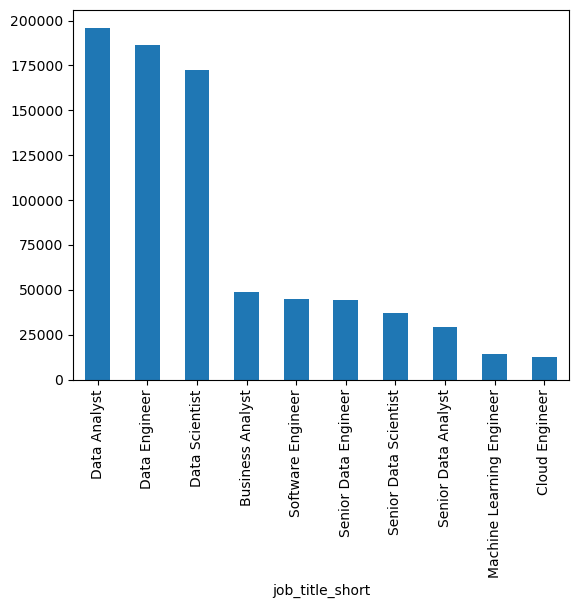

In [16]:
fig, ax = plt.subplots() # we can define any variable but mostly we have to use fig and ax which can define in the plot function ( fig is the plot and ax is the axises in the plot)

df['job_title_short'].value_counts().plot(kind='bar')

df['job_title_short'].value_counts().plot(kind='bar', ax=ax) # won't change anything right now but we can see it when ploting two separate plots into one.

In [17]:
df['job_schedule_type'].value_counts().head(3) # table 1

job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Name: count, dtype: int64

In [18]:
df['job_title_short'].value_counts() # table 2

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

<Axes: xlabel='job_schedule_type'>

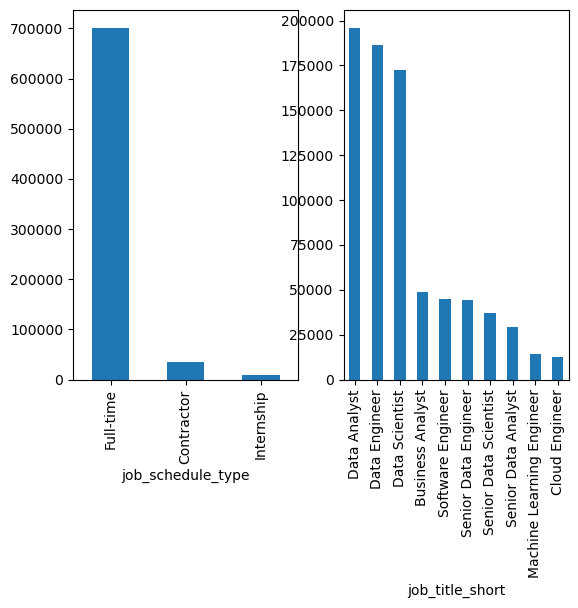

In [19]:
# Now plotting both of these table.

fig, ax = plt.subplots(1, 2) # we need to specify the number of rows and columns in the plot, since each plot has only two cols for e.g. job_title_short has a column - the name and the number, and index is the row 0.

df['job_title_short'].value_counts().plot(kind='bar', ax=ax[1]) # specifying which the index under ax=ax[] as we do in lists.
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[0])

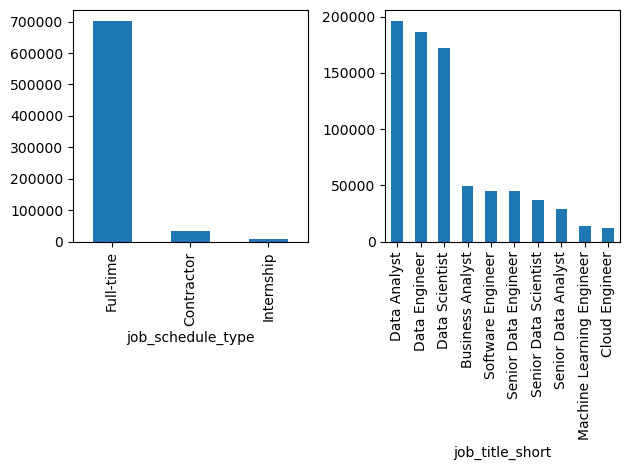

In [ ]:
# since in the graph we can see the issue with padding between two graphs we can use a function to stop the overlapping.

fig, ax = plt.subplots(1, 2) # we need to specify the number of rows and columns in the plot, since each plot has only two cols for e.g. job_title_short has a column - the name and the number, and index is the row 0.

df['job_title_short'].value_counts().plot(kind='bar', ax=ax[1]) # specifying which the index under ax=ax[] as we do in lists.
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[0])

fig.tight_layout() # use to make it more readable as it separates the two graphs.


# Example - Counts of Top Skills in Job Postings

In [21]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size() # to see which skill has how many titles requesting for it.
df_skills_count = skills_count.reset_index(name='skill_count') # since originally it is showing the last col as 0 we shall change the name of the cols.
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


In [44]:
# we need to plot for data scientist, data analyst and data engineer. We are going to define it in another variable as job_titles.

job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst'] # as a list

job_titles

['Data Scientist', 'Data Engineer', 'Data Analyst']

0 Data Scientist
1 Data Engineer
2 Data Analyst


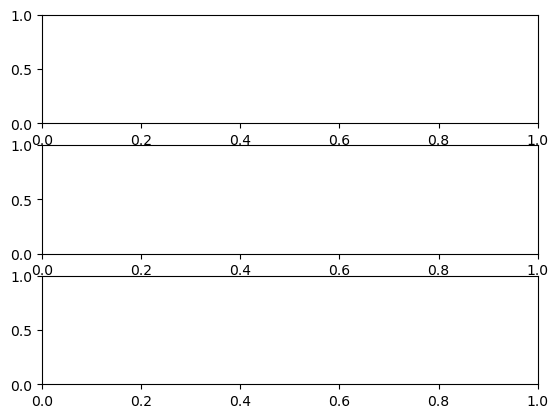

In [45]:
fig, ax = plt.subplots(3, 1) # since we are stacking it one over the other.

for i, job_title in enumerate(job_titles):  # we are going to loop it through each of the job titles.
    print(i, job_title)  # just to check / i is the index i.e. 0,1,2... and job_title is having the value of the variable in different indexes, since we uesed enumerate func.

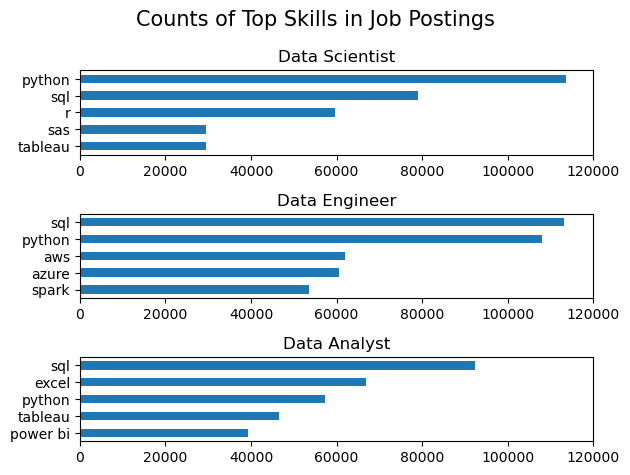

In [60]:
fig, ax = plt.subplots(3, 1) # since we are stacking it one over the other.

for i, job_title in enumerate(job_titles):  # we are going to loop it through each of the job titles.
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5) # where df_skills_count has the job title has provided on that variable job_title and head to check the top 5 skills
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title) # I was using the index value as 1 which will only provide data for the second index
    ax[i].invert_yaxis() # since it is in ascending order we will invert the y-axis assigned to all the plots.
    ax[i].set_ylabel('') # removed the redundant info of job_skills
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 120000) # since the last plot is not matching the axis required hence we are using this func to define limits for all the plots similarly.


fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15) # gives the title to entire plot. There has to be two args here.
fig.tight_layout()